In [127]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
import common as cm

# Part 1: Information Gain

Important note: this exercise uses Pandas (for data manipulation and analysis) and Graphviz (for graph-drawing) libraries. 

This exercise consists of 3 parts. Complete the first part to get a mark of 3.0, the first two parts to get 4.0, complete all assignments to get 5.0. 

1.1 ) There are 10 objects (data) characterized with 5 binary attributes:

In [128]:
attributeNames = ["attr 1", "attr 2", "attr 3", "attr 4", "attr 5"]

data = pd.DataFrame(
    [
        [1, 0, 1, 1, 1],
        [1, 1, 0, 0, 1],
        [0, 1, 1, 1, 1],
        [1, 0, 1, 0, 1],
        [1, 0, 0, 1, 1],
        [0, 0, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 0, 0, 1, 1],
        [0, 1, 0, 0, 1],
        [0, 0, 0, 1, 1],
    ],
    columns=attributeNames,
)

1.2) Each object is assigned to either a class "0" or "1". The assignments are as follows (cl):

In [129]:
data["cl"] = [1, 1, 1, 0, 0, 1, 1, 1, 0, 0]

Hint: How one can read data (columns) in Pandas:

In [130]:
print(data["cl"])
print(list(data["cl"]))
print(set(data["cl"]))
print(data["attr 1"])

0    1
1    1
2    1
3    0
4    0
5    1
6    1
7    1
8    0
9    0
Name: cl, dtype: int64
[1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
{0, 1}
0    1
1    1
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: attr 1, dtype: int64


Hint: How split data (Pandas DataFrame) base on column:

In [131]:
data[data['cl']==0]

,attr 1,attr 2,attr 3,attr 4,attr 5,cl
3,1,0,1,0,1,0
4,1,0,0,1,1,0
8,0,1,0,0,1,0
9,0,0,0,1,1,0


Hint: How take values from column (Pandas Series):

In [132]:
for id, row in data['cl'].items():
    print(id,row)

0 1
1 1
2 1
3 0
4 0
5 1
6 1
7 1
8 0
9 0


1.3 )  Finish the below function for calculating entropy. $H(CL) = - \sum_{y \in CL}p(y)log_2p(y)$ It should return a value of entropy for an input vector CL. Assume that $log_2(0)$ is equal to 0.

In [133]:
def getEntropy(cl):
    entropy = 0
    values = [0] * 2
    n = len(cl)
    for y in cl:
        values[y] +=1
    for value in values:
        if value == 0:
            continue
        entropy -= (value/n) * math.log2(value/n) 
    return entropy
        

1.4 ) Calculate the entropy for the CL vector  (the result should be 0.97095...):

In [134]:
print(getEntropy(list(data['cl'])))

0.9709505944546686


1.5) Finish the below function for calculating a conditional entropy: $H(CL|X) = - \sum_{x \in X} \sum_{y \in CL} p(x,y) log_2 \frac{p(x,y)}{p(x)}$. Assume that $log_2(0)$ is equal to 0 and if $p(x) = 0$, $\frac{p(x,y)}{p(x)}$ is equal to 0 as well.

In [135]:
def getConditionalEntropy(cl, attr):
    data2 = pd.merge(cl, attr, right_index = True, left_index = True)
    yesAttributes = data2[data2[attr.name]==1]
    noAttributes = data2[data2[attr.name]==0]
    yesEntropy = getEntropy(yesAttributes['cl'])
    noEntropy = getEntropy(noAttributes['cl'])
    n= len(cl)
    entropy = (len(yesAttributes.index)/n) * yesEntropy + (len(noAttributes.index)/n) * noEntropy 
    return entropy
    

1.6 ) Calculate conditional entropies for given attribiutes.

In [136]:
print(getConditionalEntropy(data["cl"], data["attr 1"])) ### the result should be 0.95097...
print(getConditionalEntropy(data["cl"], data["attr 5"])) ### the result should be 0.97095...

0.9509775004326937
0.9709505944546686


1.7 ) **Question: Which entropy is lesser and why?**

1.8) Finish the below function for calculating information gain (use getEntropy() and getConditionalEntropy() functions):

In [137]:
def getInformationGain(cl, attr):
    return getEntropy(cl) - getConditionalEntropy(cl, attr)

In [138]:
print(getInformationGain(data["cl"], data["attr 1"]))
print(getInformationGain(data["cl"], data["attr 5"]))

0.01997309402197489
0.0


1.9) **Question: Which IG is lesser and why?**

In [139]:
# because attr5 has always the same value and on its own don't give any insight on cl

# Part 2: ID3 algorithm

Decision tree consists of decision nodes and leaves. Nodes split data while leaves classify objects. Consider the class "Node" provided below. It consists of 4 fields:
- attr - attribute ID (use the names in attributeNames vector)
- left - left branch, i.e., a reference to other node
- right - right branch, i.e., a reference to other node
- value - a decision. If node = None, then the node is not a leaf. If value is not None, then a node is considered a leaf. 

Method __call__ returns the decision if the node is a leaf (i.e., when value is not None). 
Otherwise, it calls either the left or the right branch of an input object, based on the attribute value (0 -> left children; 1 -> right children). In this way, we can traverse the decision tree in order to find the final decision.

3


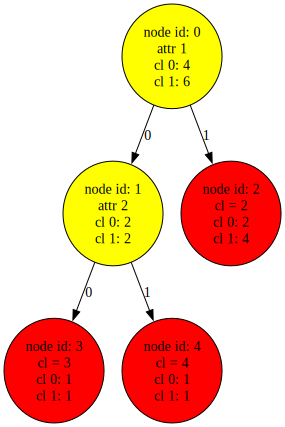

4
2
2


In [140]:
class Node:
    def __init__(self, attr, left, right, value):
        self.attr = attr
        self.left = left
        self.right = right
        self.value = value

    def __call__(self, obj):
        if self.value is None:
            if obj[self.attr] == 0:
                return self.left(obj)
            else:
                return self.right(obj)
        else:
            return self.value
        
### EXAMPLE
def example(obj):
    root = Node("attr 1", None, None, None) ###  IN ROOT SPLIT ON 1ST (0) ATTRIBUTE
    lChildren = Node("attr 2", None, None, None) ### IN ROOT's LEFT CHILDREN SPLIT ON 2ND (1) ATTRIBUTE
    rChildren = Node(None, None, None, 2) ### IN ROOT's RIGHT CHILDREN -> DECISION = 2
    root.left = lChildren
    root.right = rChildren
    llChildren = Node(None, None, None, 3) ### IN ROOT's LEFT-LEFT CHILDREN -> DECISION = 3
    lrChildren = Node(None, None, None, 4) ### IN ROOT's LEFT-RIGHT CHILDREN -> DECISION = 4
    lChildren.left = llChildren
    lChildren.right = lrChildren
    print(root(obj))
    return root
    
root = example(pd.Series([0,0],['attr 1','attr 2'])) ### ROOT : FIRST ATTRIBUTE = 0 SO WE GO TO LEFT CHILDREN.
### IT IS A LEAF WITH THE DECISION = 3
### THEN, IN THE CORRESPONDING CHILDREN, THE SECOND ATTRIBUTE = 0, SO WE GO TO LEFT-LEFT CHILDREN
cm.printGraph(root,data)

example({'attr 1':0,'attr 2':1})
example(pd.Series([1,0],['attr 1','attr 2']))
example({'attr 1':1,'attr 2':1})

2.1) Create an initial root. Set the value (decision) to 1. 

In [141]:
initRoot = Node('attr 1', None, None, 1)

2.2) Use a getErrorRate method in common.py auxiliary file to calculate the error rate. The decision is made based on the majority rule. In case of tie, the method takes 0 as the default class.

In [142]:
cm.getErrorRate(initRoot, data)
## SHOULD BE 0.4

0.4

2.3) Use printGraph method (see the common.py file) to draw the decision tree and save it in a png file.

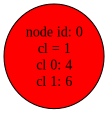

In [143]:
cm.printGraph(initRoot, data)

2.4) Calculate information gain for all attribiutes.

In [144]:

def printInformationGain(data):
    for attribute_name in attributeNames:
        print(attribute_name, getInformationGain(data['cl'], data[attribute_name]))
printInformationGain(data)

attr 1 0.01997309402197489
attr 2 0.0464393446710154
attr 3 0.12451124978365313
attr 4 0.0912774462416801
attr 5 0.0


2.5) Choose the best attribute to split the data (HINT, it should be the third attribute :)). Construct two new nodes: one for $x_i$ = 0 decision and the second for $x_i$ = 1; connect them with the root (left and right branch). Remember to update the root. 

In [145]:
initRoot.attr = 'attr 3'
initRoot.value = None
lNode = Node(None, None, None, 0)
rNode = Node(None, None, None, 1)
initRoot.left = lNode
initRoot.right = rNode

2.6) Print the graph and calculate the error rate. What happened with the error rate?

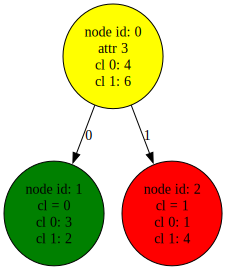

0.30000000000000004

In [146]:
cm.printGraph(initRoot, data)
cm.getErrorRate(initRoot, data)
# error rate decreased

2.7) Split the 'data' (table) based on the selected attribiute, i.e., create two new tables.

In [147]:
### TODO
left_data = data[data['attr 3']==0]
right_data = data[data['attr 3']==1]

2.8) Let us start with the left node. Firstly, calculate information gain for this node.

In [148]:
printInformationGain(left_data)

attr 1 0.4199730940219749
attr 2 0.01997309402197489
attr 3 0.0
attr 4 0.01997309402197489
attr 5 0.0


2.9) Choose the best attribute to split the data and then update the decision tree.

In [149]:
# attr 1 is the best

lNode.attr = 'attr 1'
lNode.value = None
llNode = Node(None, None, None, 0)
lrNode = Node(None, None, None, 1)
lNode.left = llNode
lNode.right = lrNode
initRoot.left = lNode


2.10) Print the graph and calculate the error rate (HINT: should be 0.2 :). What happened with the error rate?

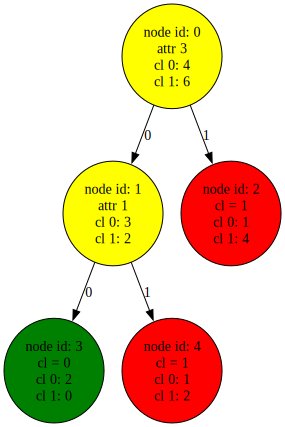

0.19999999999999996

In [150]:
cm.printGraph(initRoot, data)
cm.getErrorRate(initRoot, data)

2.11) Split data (remember that we split left_data, not data).

In [151]:
leftLeft_data = left_data[left_data['attr 1']==0]
leftRight_data = left_data[left_data['attr 1']==1]

2.12) Repeat the whole process for the right node.

In [152]:

printInformationGain(right_data)

attr 1 0.17095059445466865
attr 2 0.17095059445466865
attr 3 0.0
attr 4 0.7219280948873623
attr 5 0.0


In [153]:
rNode.attr = 'attr 4'
rNode.value = None
rlNode = Node(None, None, None, 0)
rrNode = Node(None, None, None, 1)
rNode.left = rlNode
rNode.right = rrNode
initRoot.right = rNode

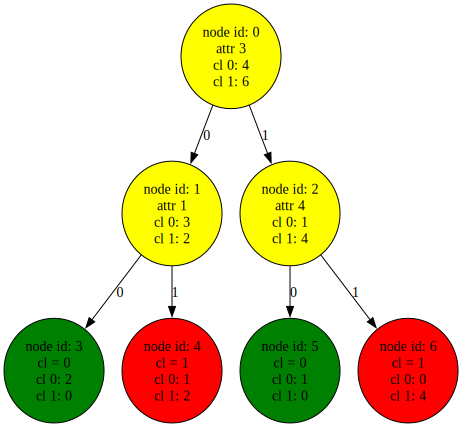

0.09999999999999998

In [154]:
# TODO print the decision tree and calculate the error rate (HINT, should be 0.1:) )
cm.printGraph(initRoot, data)
cm.getErrorRate(initRoot, data)

In [155]:

#rightLeft_data
#rightRight_data
rightLeft_data = left_data[left_data['attr 4']==0]
rightRight_data = left_data[left_data['attr 4']==1]

2.13) Let's consider left-left node. Calculate information gain for it.

In [156]:

printInformationGain(leftLeft_data)

attr 1 0.0
attr 2 0.0
attr 3 0.0
attr 4 0.0
attr 5 0.0


2.14) Will adding a new node to the tree improve its effectiveness? Why? Why not?

No, because entropy is 0 in this node so it is a leaf 

2.15) Calculate information gain for the left-right node.

In [157]:
printInformationGain(leftRight_data)

attr 1 0.0
attr 2 0.2516291673878229
attr 3 0.0
attr 4 0.2516291673878229
attr 5 0.0


In [158]:
### Select the attribute and update the tree
lrNode.attr = 'attr 2'
lrNode.value = None
lrlNode = Node(None, None, None, 0)
lrrNode = Node(None, None, None, 1)
lrNode.left = lrlNode
lrNode.right = lrrNode
lNode.right = lrNode
initRoot.left = lNode

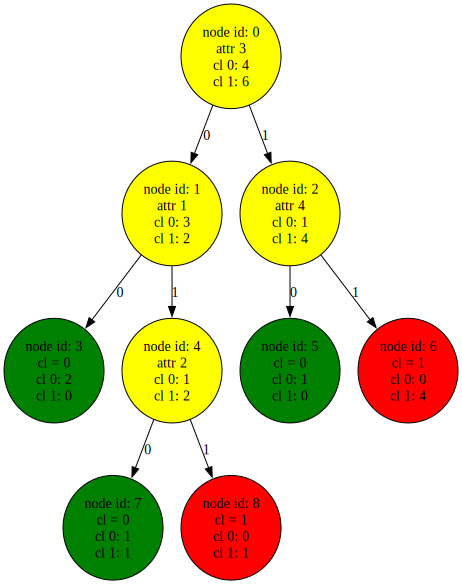

0.09999999999999998

In [182]:
### Print the decision tree and compute the error rate
cm.printGraph(initRoot, data)
cm.getErrorRate(initRoot, data)

2.16) What happened with the error rate? Is it necessary to keep these two newly added leaves?

error rate stayed the same, there is no need for keeping two leaves

2.17) Finish creating the right side of the tree

In [160]:
# right side is finised, there is no error there

# Part 3: automated construction of decision trees

3.1 Complete the following function for automated construct of decision trees, so that it returns a decision tree for the given data and attribute list. Note that this is a recusive method, i.e., calls itself.

In [175]:
max_depth = 0

def createTree(data, attributeNames, depth=0):
    data = data.reset_index().drop("index", axis=1)
    bestAttr = 'attr 1'
    maxInfGain = 0
    for attribute in attributeNames:
        gain = getInformationGain(data['cl'], data[attribute])
        if gain > maxInfGain:
            maxInfGain = gain
            bestAttr = attribute
    if depth == max_depth or maxInfGain == 0:
        return Node(None, None, None, data['cl'].mode().iloc[-1])
    left_data = data[data[bestAttr]==0]
    right_data = data[data[bestAttr]==1]
    leftNode = createTree(left_data, attributeNames, depth+1)
    rightNode = createTree(right_data, attributeNames, depth+1)
    return Node(bestAttr, leftNode, rightNode, None)



3.2) Build a decision tree for a training dataset in the common.py auxiliary file, for diffrent values of max_depth.  Calculate & compare the error rates for training and validation datasets.

In [176]:
max_depth = 10

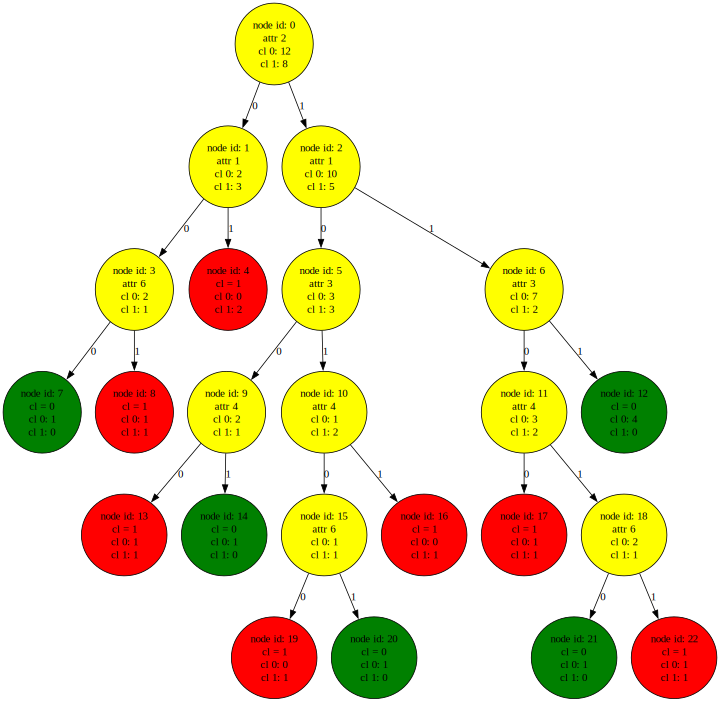

In [177]:
# Training dataset
train_attributeNames, train_data = cm.getTrainingDataSet()
tree = createTree(train_data, train_attributeNames)
cm.printGraph(tree, train_data)


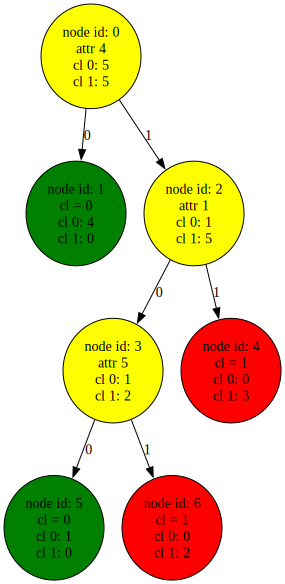

In [178]:
# Validation dataset
valid_attributesName, valid_data = cm.getValidationDataSet()
tree = createTree(valid_data, valid_attributesName)
cm.printGraph(tree, valid_data)

3.3) Consider only the training data set and answer the following questions:
* What is the miximum depth of the tree (consider only the training data set)?
* The tree building process should stop when there is no improvement in error rate (why?). Check for which value of "max_dept" there is no improvement in error rate. 

In [ ]:
for i in range(10):
    max_depth = i
    tree = createTree(train_data, train_attributeNames)
    error = cm.getErrorRate(tree, train_data)
    print(i, error)


# maximum depth is 6, because it has 6 attributes to split data
# Because ofter simpler solution is best one. For value 4 is no improvement, so it should stop at 3.

0 0.4
1 0.35
2 0.30000000000000004
3 0.25
4 0.25
5 0.19999999999999996
6 0.19999999999999996
7 0.19999999999999996
8 0.19999999999999996
9 0.19999999999999996
